### Decision tree for income prediction

Similar to linear models, the library provides several special classes for decision trees, e.g., `TreeClassifier` for classification tasks and `TreeRegressor` for regression tasks. These classes have a special method `explain` for generating both global explanations (the tree structures) and local explanations (the decision paths).

In [1]:
import sys
import os

module_path = os.path.abspath('E:/Codes/OmniXAI/')
if module_path not in sys.path:
    sys.path.append(module_path)

# For Jupyter notebooks or interactive environments where __file__ is not defined
try:
    # Try to use __file__ if available
    directory = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # If __file__ is not defined (e.g., in Jupyter), use the current working directory
    directory = os.path.abspath('')
    
sys.path.append(os.path.dirname(directory))

In [2]:
import os
import sklearn
import numpy as np
import pandas as pd
from omnixai.data.tabular import Tabular
from omnixai.explainers.tabular.specific.decision_tree import TreeClassifier

The dataset used in this example is for income prediction (https://archive.ics.uci.edu/ml/datasets/adult). For tree-based models, we use `Tabular` to represent a tabular dataset, which can be constructed from a pandas dataframe or a numpy array. To create a `Tabular` instance given a numpy array, one needs to specify the data, the feature names, the categorical feature names (if exists) and the target/label column name (if exists).

In [3]:
feature_names = [
    "Age", "Workclass", "fnlwgt", "Education",
    "Education-Num", "Marital Status", "Occupation",
    "Relationship", "Race", "Sex", "Capital Gain",
    "Capital Loss", "Hours per week", "Country", "label"
]
data = np.genfromtxt(os.path.join('../data', 'adult.data'), delimiter=', ', dtype=str)
tabular_data = Tabular(
    data,
    feature_columns=feature_names,
    categorical_columns=[feature_names[i] for i in [1, 3, 5, 6, 7, 8, 9, 13]],
    target_column='label'
)

To train a tree-based model, the method `fit` is called with the training dataset (a `Tabular` instance).

In [4]:
np.random.seed(1)
model = TreeClassifier()
model.fit(tabular_data, max_depth=4)

Validation accuracy: 0.8446184553968985


The tree-based model has both global explanations and local explanations, which can be generated by calling the method `explain`. For example, calling `explain` with test instances will return the decision paths.

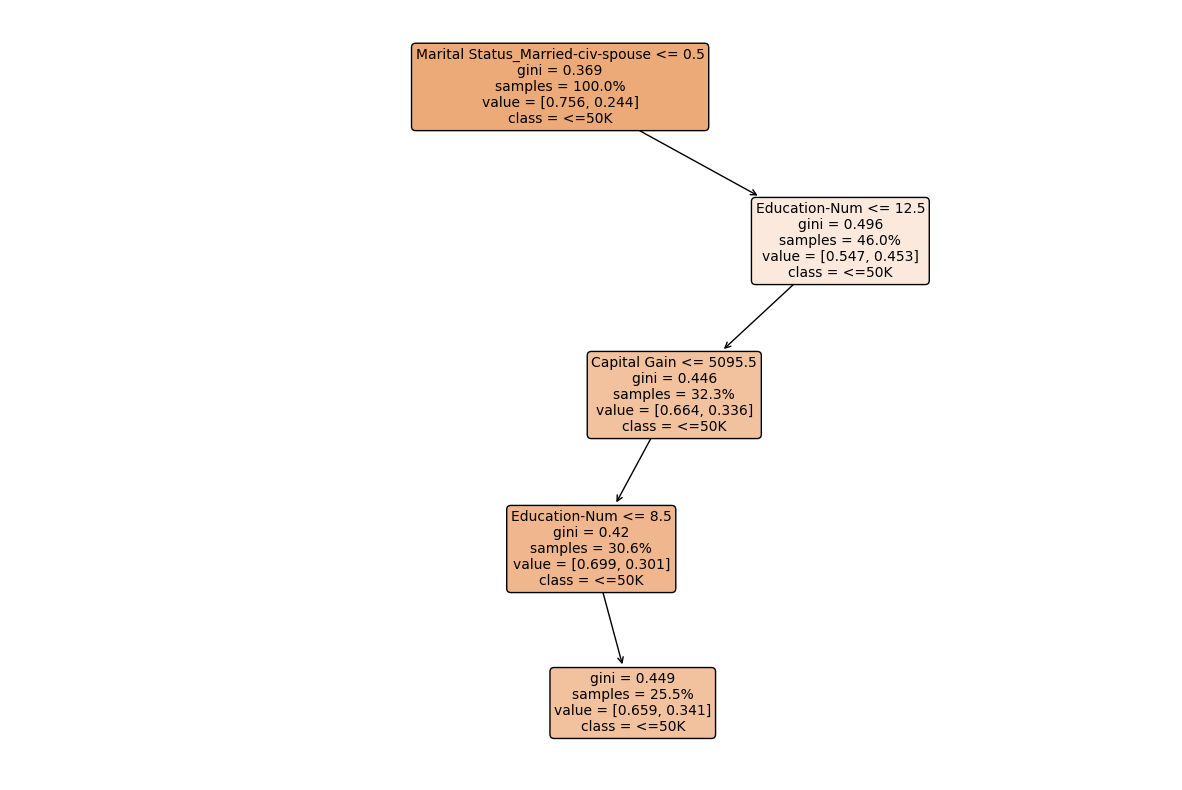

In [5]:
i = 1653
test_x = tabular_data[i:i + 5]
explanations = model.explain(test_x)
explanations.ipython_plot(index=0)